In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Filter out DeprecationWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [13]:
X = pd.read_csv(r"Linear_X_Train.csv")
Y = pd.read_csv(r"Linear_Y_Train.csv")

#convert into array
X = X.values
Y = Y.values

#normalisation
u = X.mean()
std = X.std()
X = (X-u)/std
print(X)

[[-0.25352061]
 [-0.55541377]
 [ 1.07380656]
 ...
 [-0.26950343]
 [ 1.72730762]
 [-0.4575866 ]]


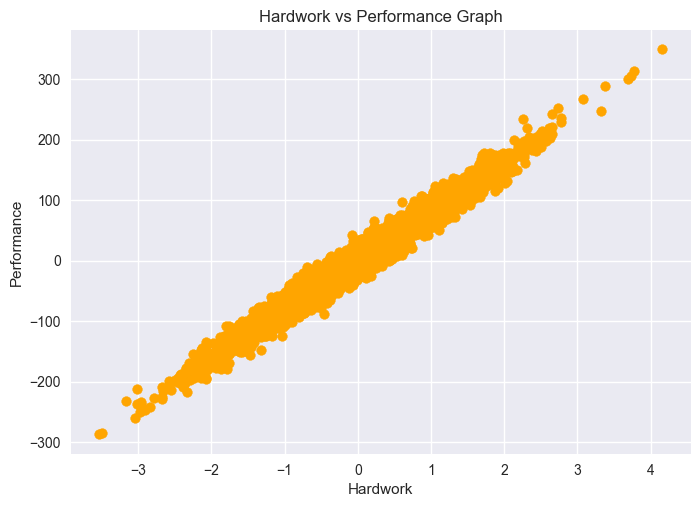

In [14]:
plt.style.use('seaborn-v0_8')
plt.scatter(X,Y,color = 'orange')
plt.title('Hardwork vs Performance Graph')
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [15]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x

    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m

def gradient_descent(X,Y,max_steps = 100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):

        #Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        #update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list
    
        

In [25]:
theta,error_list,theta_list = gradient_descent(X,Y)

In [26]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

In [27]:
theta

array([ 0.6838508 , 79.90361453])

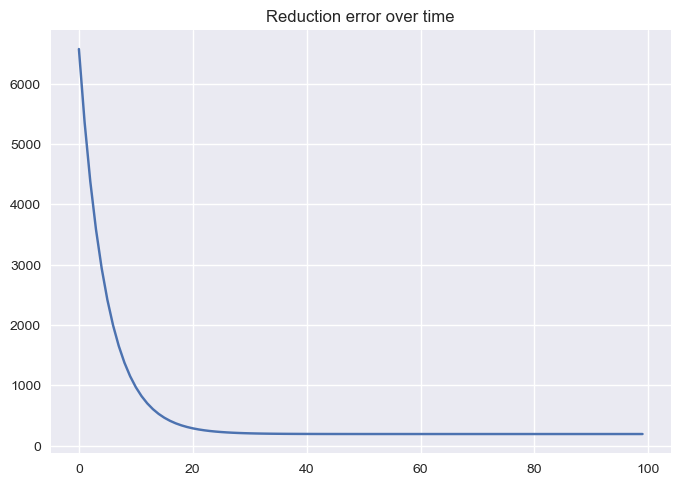

In [28]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [29]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


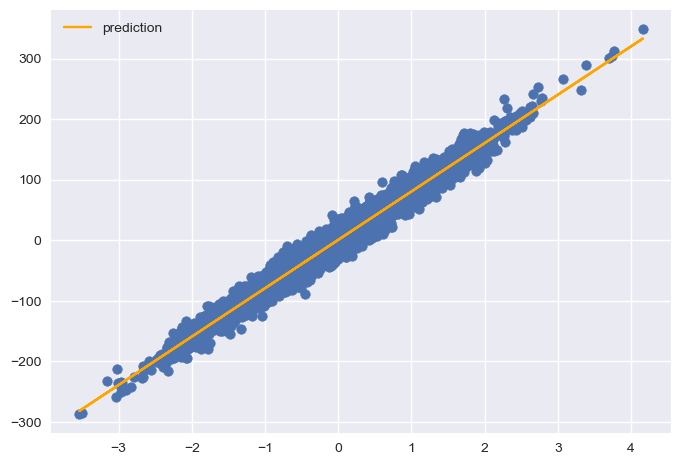

In [30]:
#Training + prediction
plt.scatter(X,Y)
plt.plot(X,y_,color = "orange",label = "prediction")
plt.legend()
plt.show()

In [31]:
# Load the test data
x_test = pd.read_csv(r"./Linear_X_Test.csv").values
y_test = hypothesis(x_test,theta)
x_test.shape,y_test.shape

((1250, 1), (1250, 1))

In [32]:
#Submission
df = pd.DataFrame(y_test,columns=["y"])
df.to_csv('y_preidiction.csv',index = False)

In [33]:
def r2_score(Y,Y_):

    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)

    score = (1-num/denom)
    return score*100

In [34]:
r2_score(Y,y_)

97.09612226971643

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [46]:
theta

array([ 0.6838508 , 79.90361453])

In [49]:
# loss function
T0 = np.arange(-40,40,1)
T1 =  np.arange(40,120,1)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j]=np.sum((y_-Y)**2)/Y.shape[0]
    

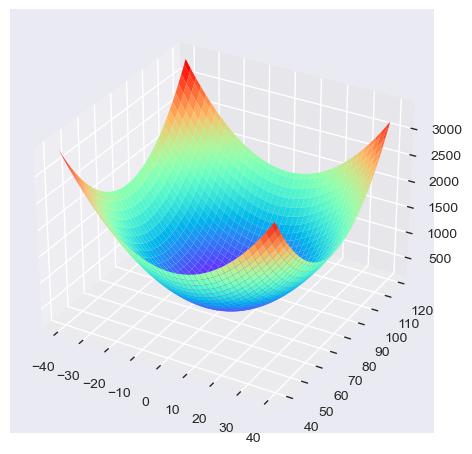

In [51]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

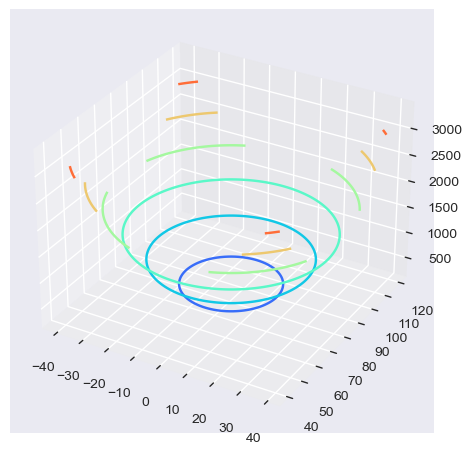

In [53]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

In [55]:
theta_list = np.array(theta_list)
theta_list

array([[6.83868968e-02, 7.99057369e+00],
       [1.29935104e-01, 1.51820900e+01],
       [1.85328490e-01, 2.16544547e+01],
       [2.35182538e-01, 2.74795829e+01],
       [2.80051181e-01, 3.27221983e+01],
       [3.20432960e-01, 3.74405522e+01],
       [3.56776561e-01, 4.16870707e+01],
       [3.89485801e-01, 4.55089373e+01],
       [4.18924118e-01, 4.89486173e+01],
       [4.45418603e-01, 5.20443292e+01],
       [4.69263640e-01, 5.48304700e+01],
       [4.90724172e-01, 5.73379967e+01],
       [5.10038652e-01, 5.95947707e+01],
       [5.27421684e-01, 6.16258673e+01],
       [5.43066412e-01, 6.34538543e+01],
       [5.57146668e-01, 6.50990426e+01],
       [5.69818898e-01, 6.65797120e+01],
       [5.81223905e-01, 6.79123145e+01],
       [5.91488411e-01, 6.91116567e+01],
       [6.00726467e-01, 7.01910648e+01],
       [6.09040717e-01, 7.11625320e+01],
       [6.16523542e-01, 7.20368525e+01],
       [6.23258085e-01, 7.28237409e+01],
       [6.29319173e-01, 7.35319405e+01],
       [6.347741

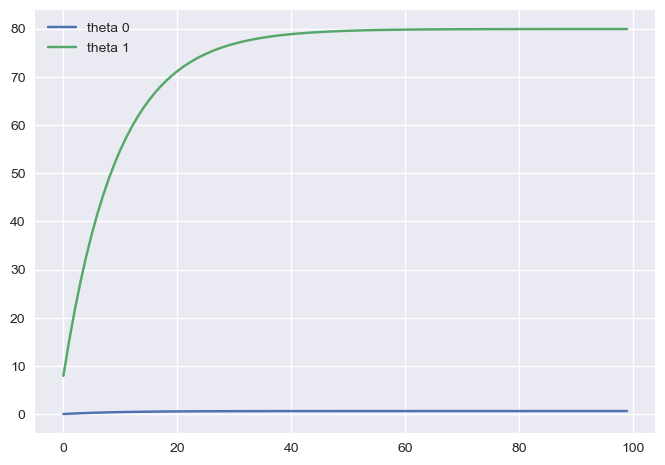

In [57]:
plt.plot(theta_list[:,0],label = 'theta 0')
plt.plot(theta_list[:,1],label = 'theta 1')
plt.legend()
plt.show()

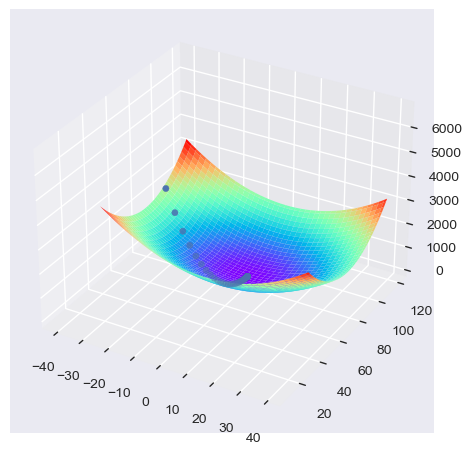

In [59]:
#trajectory traced by theta updates in the loss function

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

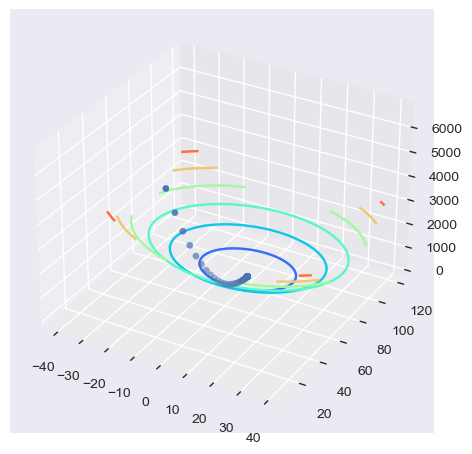

In [61]:
#trajectory traced by theta updates in the loss function

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

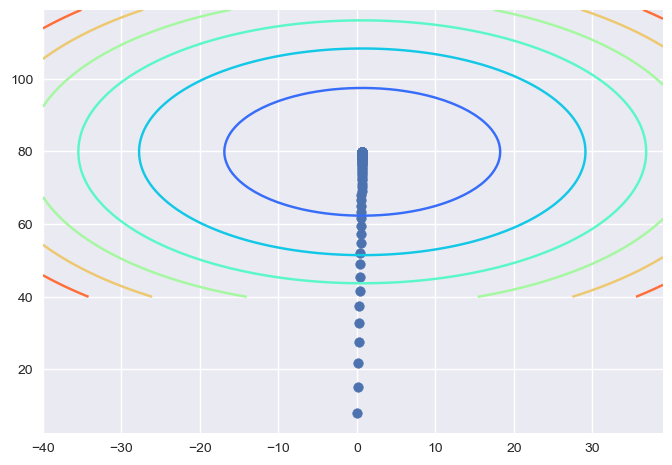

In [62]:
#2d contour plot
plt.contour(T0,T1,J,cmap = 'rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [65]:
theta_list
np.save("ThetaList.npy",theta_list)

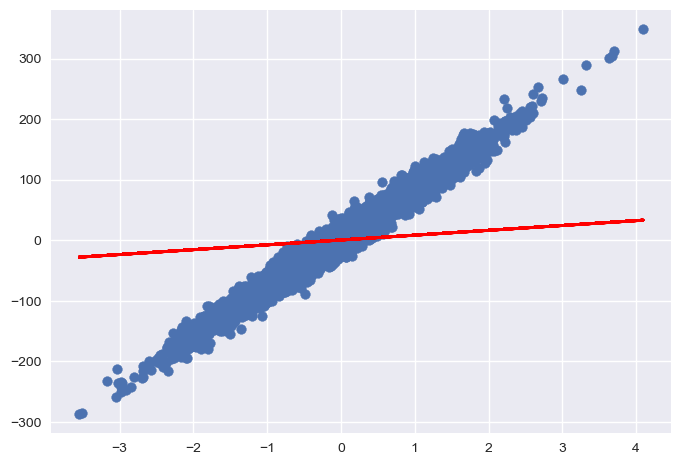

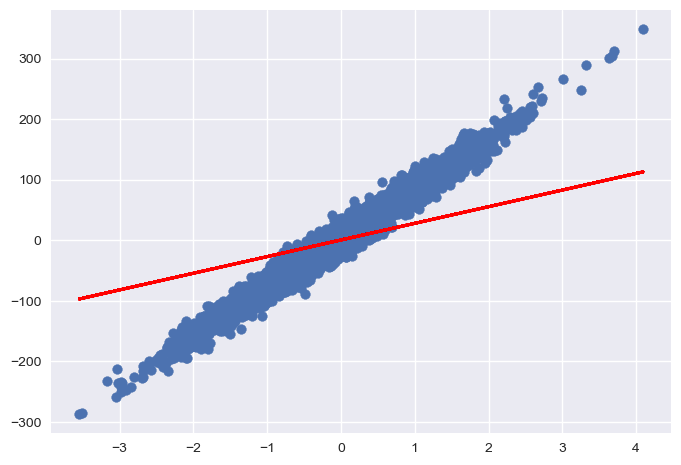

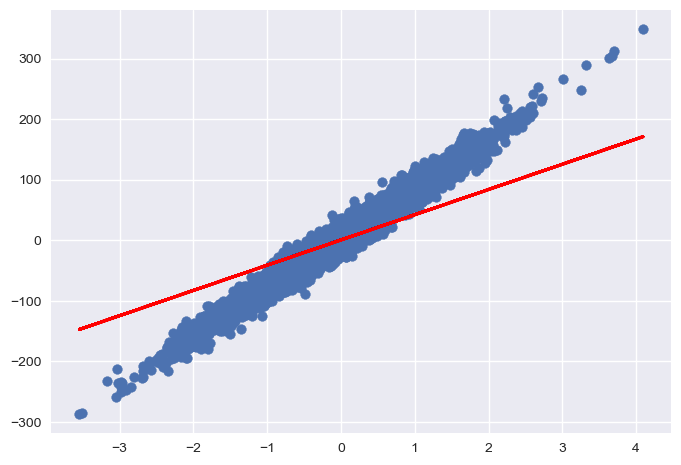

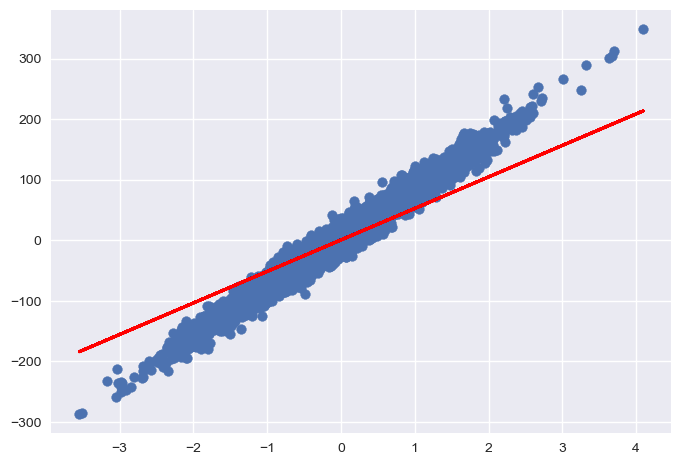

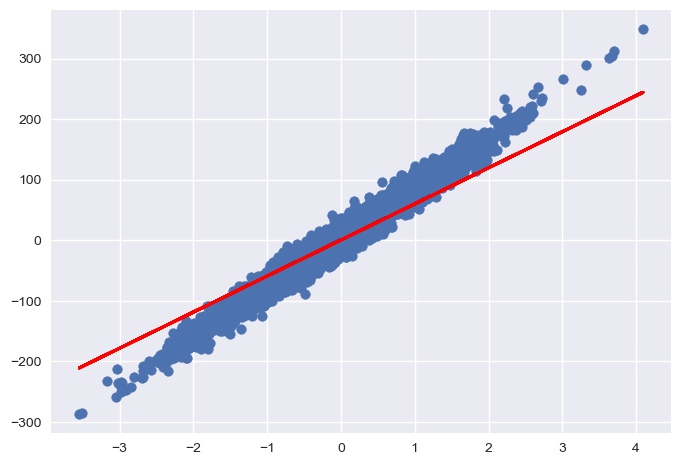

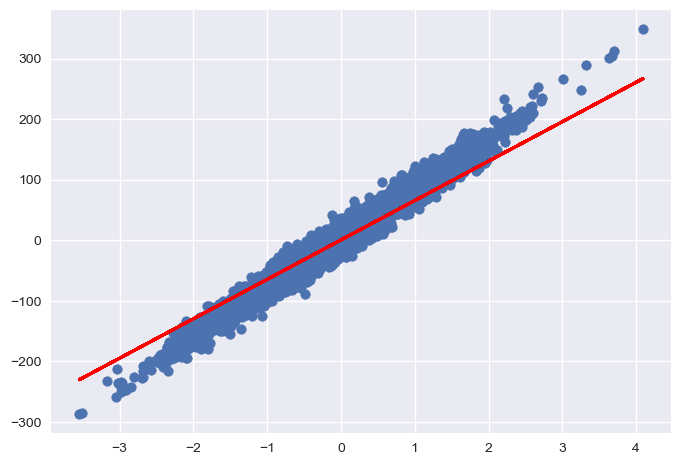

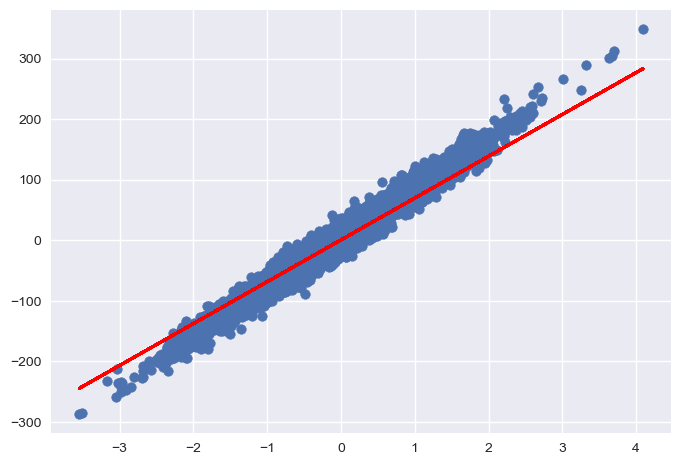

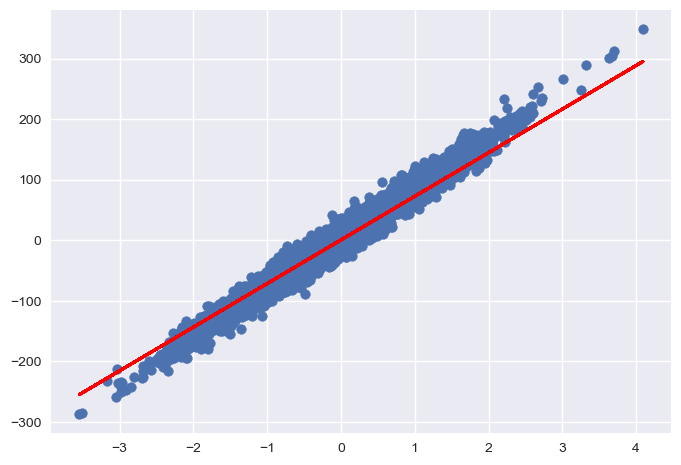

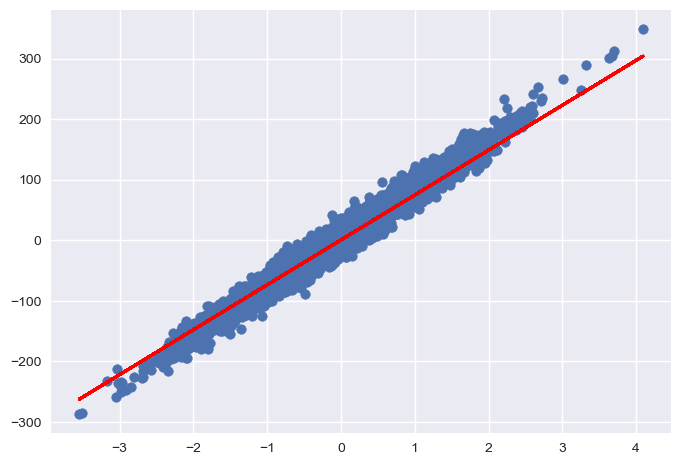

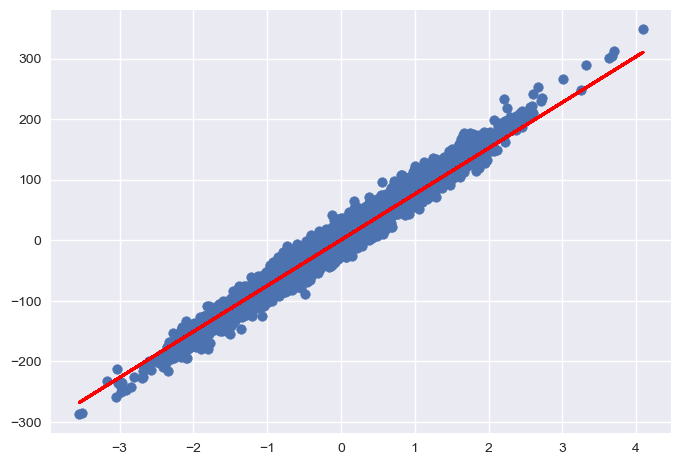

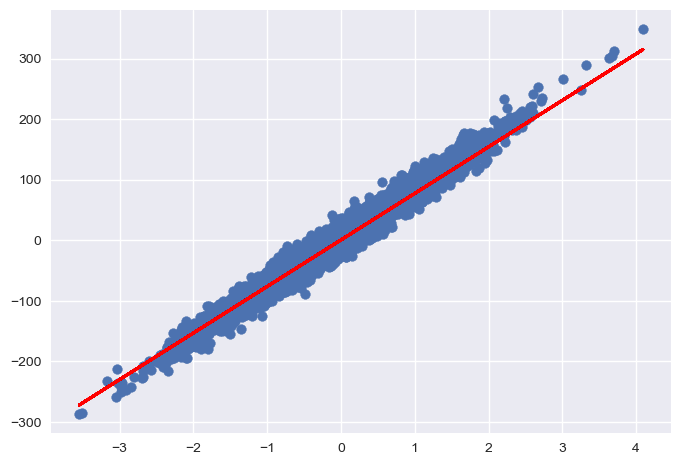

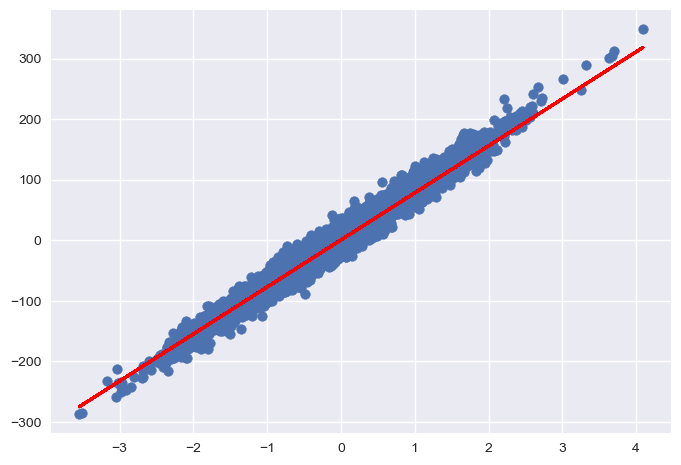

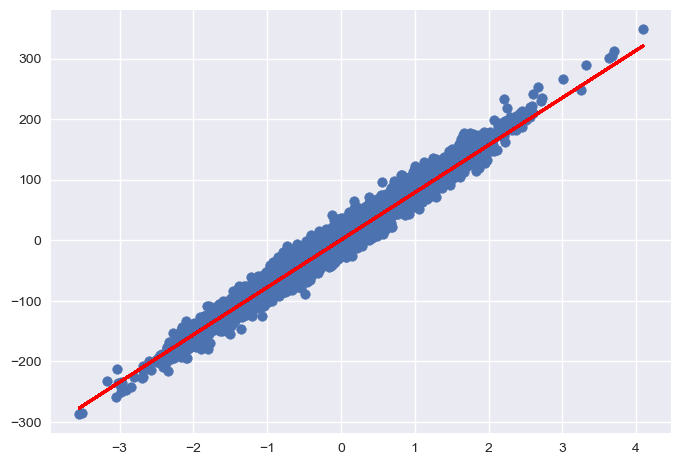

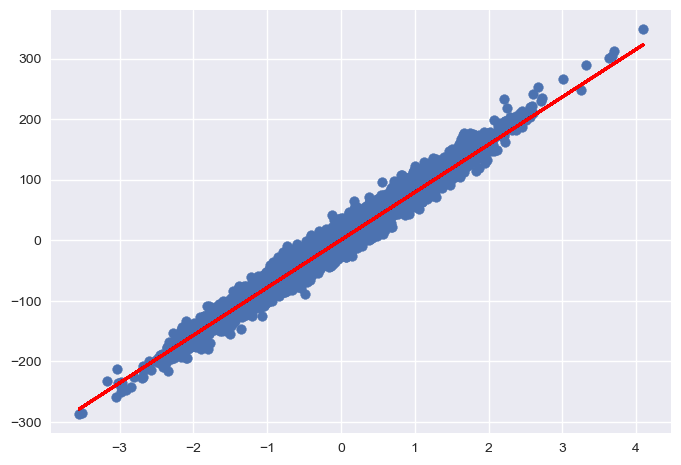

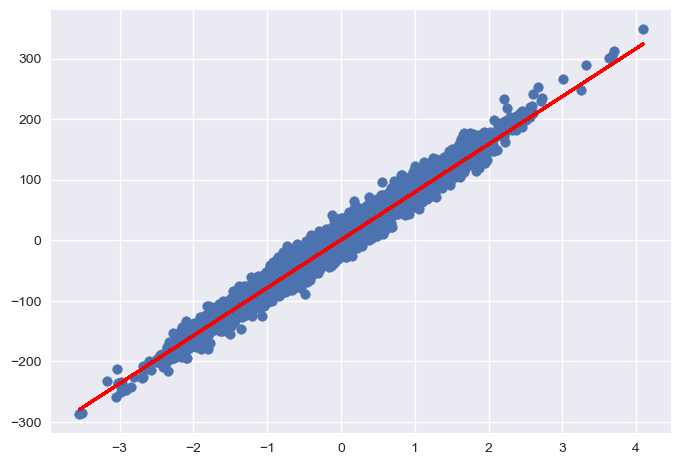

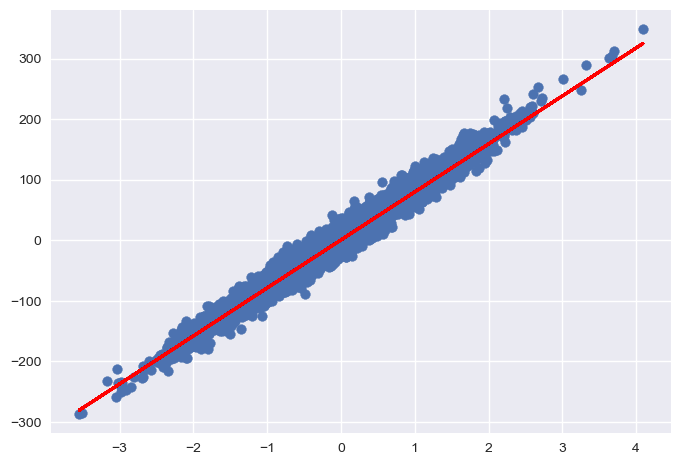

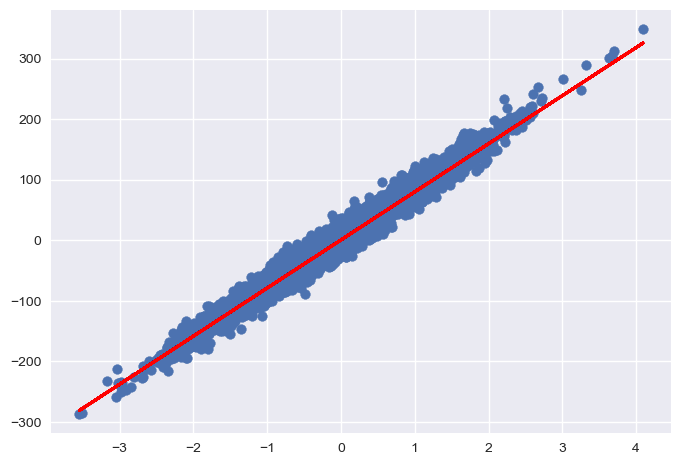

<Figure size 800x550 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = pd.read_csv(r"Linear_X_Train.csv").values
y = pd.read_csv(r"Linear_Y_Train.csv").values

theta = np.load("ThetaList.npy")

plt.ion()

T0 = theta[:,0]
T1 = theta[:,1]

for i in range(0,50,3):
    y_ = T1[i]*x +T0
    plt.scatter(x,y)
    plt.plot(x,y_,'red')
    plt.draw()
    plt.pause(1)
    plt.clf()
